<a href="https://colab.research.google.com/github/shubhamjain02/Customer_Segmentation/blob/master/FinalCustomer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer Segmentation Problem**
___
> **Problem Statement** : 
Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.



It is one the most important applications of unsupervised learning. In this machine learning project, we will make use of K-means clustering and Hierarchical Clustering which are the essential algorithm for clustering unlabeled dataset.


**Note :** You can download the dataset for customer segmentation project [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

#Downloading the Dataset into your Colab Notebook 


After executing the following code, you will require to upload the Credentials of your Kaggle Account :
1. Open "My Account" in your Kaggle Account.
2. Download the Json file by cliking on "Generate New API Token".
3. Upload the Json file when asked to Upload Files


In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamjain2","key":"3ef63b7776c17bf67410c1bd7c4a87fc"}'}

> Import the Dataset

In [2]:
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
#Importing Data
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python


  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.32MB/s]


In [0]:
#Unzipping the Files
from zipfile import ZipFile
file_name='customer-segmentation-tutorial-in-python.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

#**Steps of Solution**

1. Importing Libraries.
2. Loading and Exploration of data.
3. Outlier Detection.
4. Visualization of Data. 
5. Clustering using K-Means Algorithm.
6. Clustering using Hierarchical Algorithm.


#**Step 1**  Importing the Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder # For Label Encoding
from sklearn.cluster import KMeans # For K-means Algorithm
from sklearn.cluster import AgglomerativeClustering # For Hierarchical Clustering
import scipy.cluster.hierarchy as sch # For Dendogram Method to find Cluster number

#**Step 2** Loading and Exploration of the Dataset

In [0]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here, spending score is the score that the amount computed for each of the clients based on several criteria including for example their income, the number of times they show up in the mall, the amount of they spend in a year etc. 

The closed the spending score is to 1 the less the client spends and the more the spending score is to 100 the more the client spends.

In [7]:
print('DataSet dimensions:', df.shape)

DataSet dimensions: (200, 5)


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

---
**Checking for NULL values.**

---

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

---

**Checking for Duplicate entries.**

---

A person can shop many times which can lead to duplicacy of entries. 

In [10]:
print('Duplicates Count: {}'.format(df.duplicated().sum()))

Duplicates Count: 0


**Conclusions :**

1. There are no NULL values.
2. There is one "object" datatype which need to be encoded. So, let **Male be denoted as 1 and Female as 0**.
3. Customer ID does not play a role in Clustering the groups. So, first column of dataset should be dropped.


In [0]:
df = df.drop('CustomerID', axis = 1)

In [0]:
labelencoder = LabelEncoder()
df['Gender']= labelencoder.fit_transform(df['Gender'])

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#**Step 3** Outlier Detection

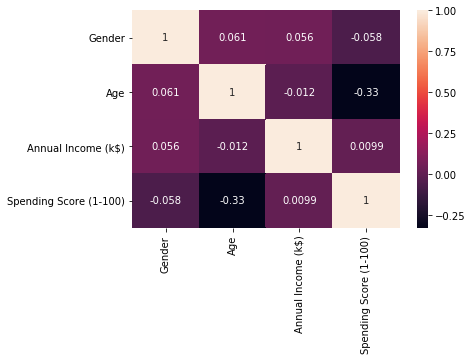

In [14]:
sns.heatmap(df.corr(), annot = True)

All the variables have a very less correlation factor, ie., the variables are very less correlated. So, there is no need for Dropping and variable in the dataset.

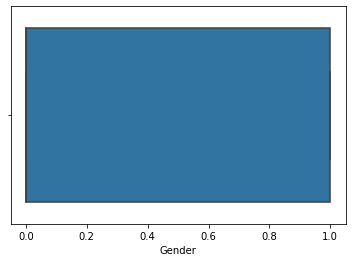

In [15]:
sns.boxplot(x=df['Gender'])

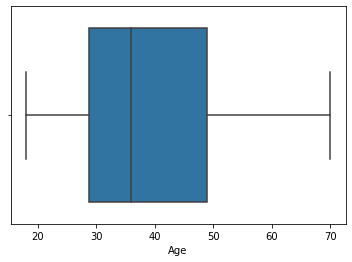

In [16]:
sns.boxplot(x=df['Age'])

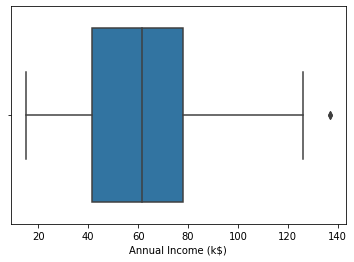

In [17]:
sns.boxplot(x=df['Annual Income (k$)'])

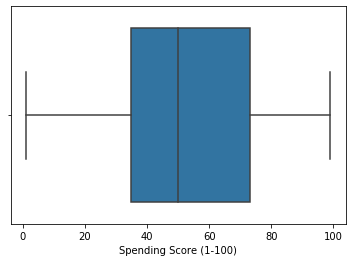

In [18]:
sns.boxplot(x=df['Spending Score (1-100)'])

**Conclusion :**

There are almost no outliers present.

#**Step 4** Visualization of Data

---
1. **Gender Count**

---
> Notation:
    
  *   Male = 1
  *   Female = 0 

In [19]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

56% of the total Customers are females and 44% are males.


---

2. **Histograms of Data** 

---

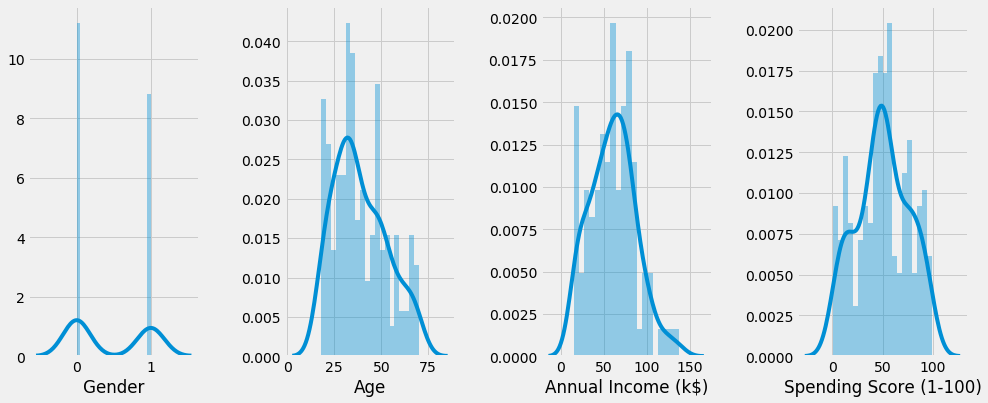

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Gender', 'Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
plt.show()

---
3. **Scatter Plots**

---

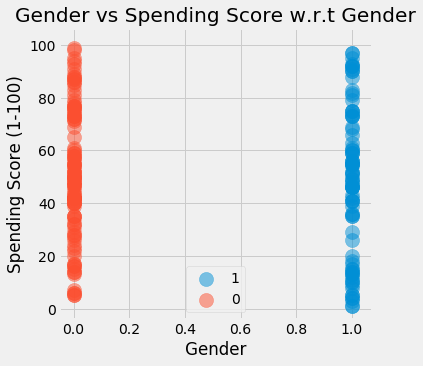

In [21]:
#Plot of Gender v/s Spending Score
plt.figure(1 , figsize = (5 , 5))
for gender in [1, 0]:
  plt.scatter(x = 'Gender',y = 'Spending Score (1-100)' , data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Gender'), plt.ylabel('Spending Score (1-100)') 
plt.title('Gender vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

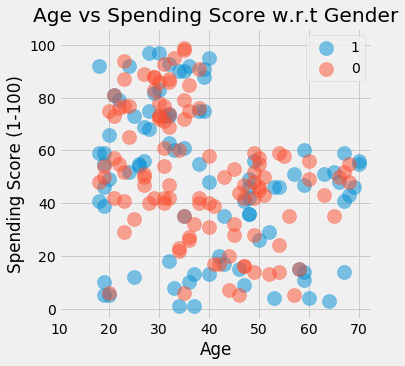

In [22]:
#Plot of Age v/s Spending Score
plt.figure(1 , figsize = (5 , 5))
for gender in [1, 0]:
  plt.scatter(x = 'Age',y = 'Spending Score (1-100)' , data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score w.r.t Gender')
plt.xticks(ticks = [10,20,30,40,50,60,70])
plt.legend()
plt.show()

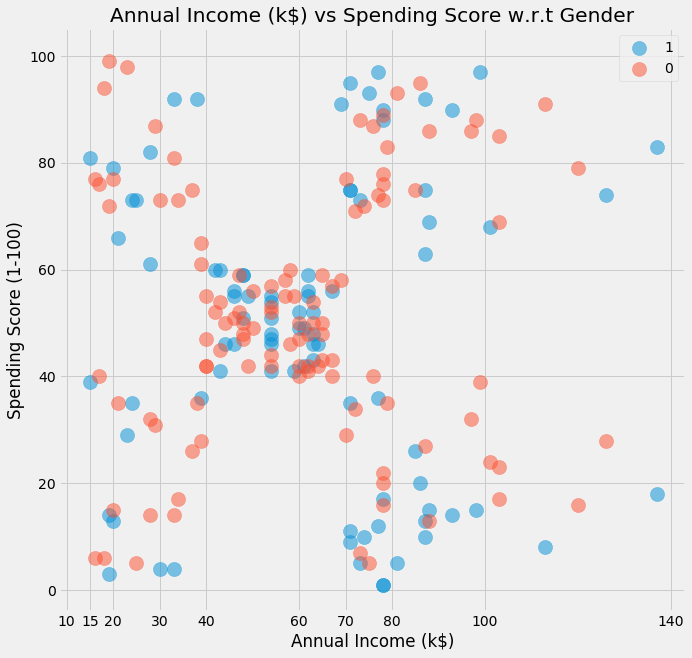

In [23]:
#Plot of Annual Income v/s Spending Score
plt.figure(1 , figsize = (10 , 10))
for gender in [1, 0]:
  plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' , data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income (k$) vs Spending Score w.r.t Gender')
plt.xticks(ticks = [10,15,20,30,40,60,70,80,100,140])
plt.legend()
plt.show()

**Conclusions :**

This analysis of Scatter Plot helps in identifying the effect of Each Variable on Spending Score. Our AIM is to include only those variables, that have significant effect in making Clustors (i.e, distributing Customers into different types).

1. From the plot of **Gender v/s Spending Score** , we see that whether a customer is a Male or Female, their spending score varies continously from 0 to 100. Thus, Gender is not helpful in making the clusters of Dataset. So, we will not include it in the Clustering Process.

2. From the plot of **Age v/s Spending Score**, we can make approximately three Clusters to segregate the people. But, the actual number of clusters will be decided by including other variables also.

3. It is very much clear from the plot of **Annual Income v/s Spending Score**, that it will play a dominant role in making Clusters. If it was the only factor to decide, we would have segregated customers into 5 Categories.

Hence, the actual no. of Clusters will be decided by variables **Age** and **Annual Income** taken together, along with of-course the **Spending Score**.



#**Step 5** Clustering Using K-Means Algorithm

**Elbow Method to find the number of Clusters**

1. WCSS is defined as the Within Cluster Sum of Squares. It is the measure of sum of distances of observations from their cluster centroids. 
2. The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes a WCSS for all clusters.
3. The lesser the WCSS, the better is the model.
4. WCSS will eventually tend to 0 as no. of clusters tend to no. of observations. So, for an optimal number of clusters, **the point upto which the Decrement in WCSS is large is taken as the optimal number of Cluster.** 

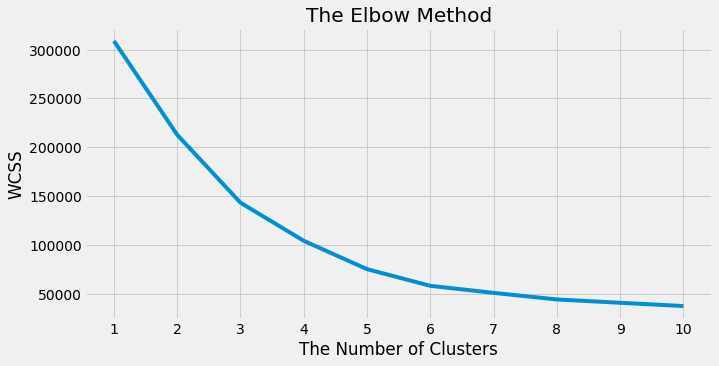

In [24]:
X = df[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (10 , 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10])
plt.xlabel('The Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the graph , it is clear that the optimal number of clusters is 6.


In [0]:
# Applying K-means to the Mall datasheet
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [26]:
#Visualizing Clusters
labels = kmeans.labels_
centroids3 = kmeans.cluster_centers_
df['label'] =  labels
trace1 = go.Scatter3d(x= df['Age'], z= df['Annual Income (k$)'], y= df['Spending Score (1-100)'], mode='markers', marker=dict(color = df['label'], size= 10, line=dict(color= df['label'], width= 12), opacity=0.8))
data = [trace1]
layout = go.Layout(title= 'Clusters',scene = dict(xaxis = dict(title  = 'Age'), zaxis = dict(title  = 'Annual Income'), yaxis = dict(title  = 'Spending Score')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

**Conclusions :**

---

 1. **Target Customer** (denoted by Red and Orange Colour)
    
 (a)  Red Colour

        -Age: 20-40 Years
        -Income: High

 (b)  Orange Colour
    
        -Age: 20-40 Years
        -Income: Low

These are the Clusters of people that should be targeted by a Company to get Maximum Earning.

2. **Standard Customers** (denoted by Blue and Violet Colours)
  
    -Age: 20-70 Years
    
    -Income: Average

2. **Low-Spending Customers** (denoted by Yellow and Purple Colours)
  
    -Age: 20-70 Years
    
    -Income: Either High or Low

These are those Customers that Company Should least focus for their Earning.

#**Step 6** Clustering using Hierarchical Clustering

**Determining Number of Clusters based on the Dendograms**

1. An imaginary horizontal line drawn at a particular Euclidean distance, cuts the dendogram at various points.

2. The number of points the line cuts, tell about how many different types of clusters do we want in out analysis.

3. The standard approach is to find that part of **longest vertical line** (drawn in figure), that doesn't cross any of the extended horizontal lines (drawn) .

4. Now, drawn an imaginary horizontal line through that part of vertical line and find out the points of intersection.

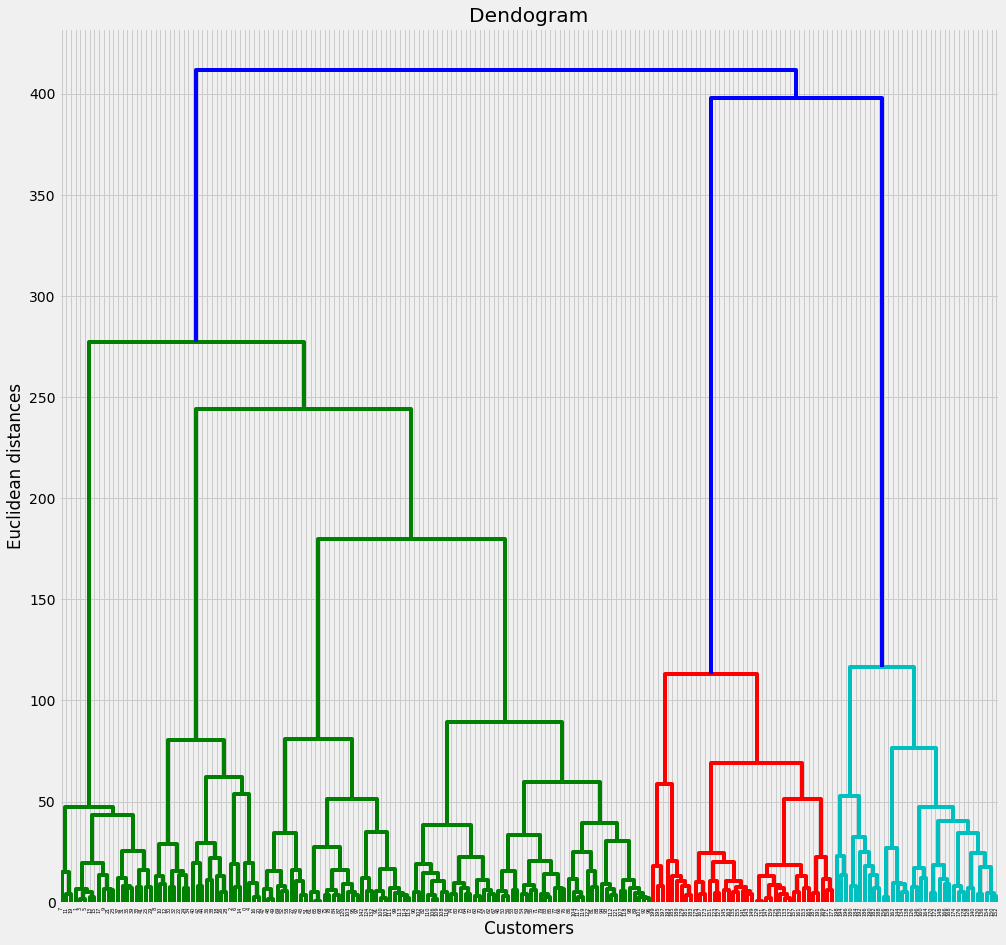

In [28]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(1, figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the Dendogram , it is clear that the **lowest part of the 2nd blue colored line from the left** gives the optimal number of clusters i.e, 6.


In [0]:
# Fitting Hierarchical Clustering to the mall dataset 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [30]:
#Visualizing Clusters
labels = hc.labels_
df['label'] =  labels
trace1 = go.Scatter3d(x= df['Age'], z= df['Annual Income (k$)'], y= df['Spending Score (1-100)'], mode='markers', marker=dict(color = df['label'], size= 10, line=dict(color= df['label'], width= 12), opacity=0.8))
data = [trace1]
layout = go.Layout(title= 'Clusters',scene = dict(xaxis = dict(title  = 'Age'), zaxis = dict(title  = 'Annual Income'), yaxis = dict(title  = 'Spending Score')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

**Conclusions :** (Same as K-means, with just change in Colour Notations)

---

 1. **Target Customer** (denoted by Red and Purple Colour)
    
 (a)  Red Colour

        -Age: 20-40 Years
        -Income: High

 (b)  Purple Colour
    
        -Age: 20-40 Years
        -Income: Low

These are the Clusters of people that should be targeted by a Company to get Maximum Earning.

2. **Standard Customers** (denoted by Yellow and Violet Colours)
  
    -Age: 20-70 Years
    
    -Income: Average

2. **Low-Spending Customers** (denoted by Orange and Blue Colours)
  
    -Age: 20-70 Years
    
    -Income: Either High or Low

These are those Customers that Company Should least focus for their Earning.